# 概率密度函数
## PDF
CDF的导数称为概率密度函数PDF(probability density function)。
- 指数分布PDF：$PDF_{expo}(x)=\lambda e^{-\lambda x}$
- 正态分布PDF：$PDF_{normal}(x)=\frac{1}{\sigma \sqrt{2\pi}}exp[-\frac{1}{2}(\frac{x-\mu}{\sigma})^2]$

对美国成年女性身高进行建模得到的正态PDF，以及样本为500的核密度估计：

In [1]:
%matplotlib inline
from __future__ import print_function, division

import numpy as np
import pandas
import thinkstats2
import thinkplot
import nsfg

0.0333001249896


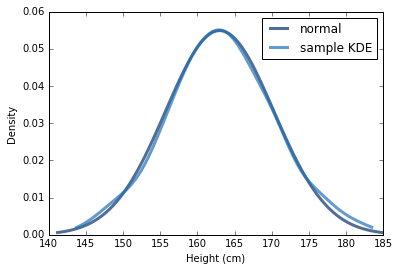

In [3]:
import random
import math

def MakePdfExample(n=500):
    """Plots a normal density function and a KDE estimate.

    n: sample size
    """
    # mean and var of women's heights in cm, from the BRFSS
    mean, var = 163, 52.8
    std = math.sqrt(var)

    # make a PDF and compute a density, FWIW
    pdf = thinkstats2.NormalPdf(mean, std)
    print(pdf.Density(mean + std))

    # make a PMF and plot it
    thinkplot.PrePlot(2)
    thinkplot.Pdf(pdf, label='normal')

    # make a sample, make an estimated PDF, and plot it
    sample = [random.gauss(mean, std) for _ in range(n)]
    sample_pdf = thinkstats2.EstimatedPdf(sample)
    thinkplot.Pdf(sample_pdf, label='sample KDE')

    thinkplot.Config(root='pdf_example',
                   xlabel='Height (cm)',
                   ylabel='Density')
MakePdfExample()

上图以BRFSS的成年女性身高（单位为厘米）的均值和方差为参数，创建一个normal PDF对象。计算这个分布在距均值一个标准差处的密度为0.03，单位为每厘米的概率值。概率密度自身并没有太多含义，但是绘制PDF，我们就能看出这个分布的形状。

## 核密度估计
核密度估计KDE(kernel density estimation)，是一种算法，可以对一个样本寻找符合样本数据的适当平滑的PDF。

## 矩
- 原始矩(raw moment):$m_k^`=\frac{1}{n}\sum_i x_i^k$
- 中心矩(contral moment):$m_k=\frac{1}{n}\sum_i (x_i - \bar{x})^k$

## 偏度
- 偏度(skewness)
- 样本偏度
- Pearson中位数偏度系数(Pearson's median skewness coefficient):$g_p=3(\bar{x}-m)/S$
    - $\bar{x}$是样本均值
    - m是中位数
    - S是标准差
    - 这个统计量是稳健的(robust)，即受离群值的影响较小

In [5]:
def MakeFrames():
    """Reads pregnancy data and partitions first babies and others.

    returns: DataFrames (all live births, first babies, others)
    """
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    assert len(live) == 9148
    assert len(firsts) == 4413
    assert len(others) == 4735

    return live, firsts, others
live, firsts, others = MakeFrames()

Birth weight
mean 7.26562845762
std 1.40829344557
median 7.375
skewness -0.589506268758
pearson skewness -0.233000289547


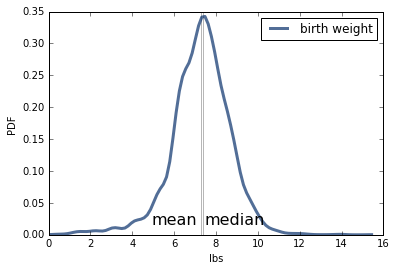

In [6]:
def VertLine(x, y):
    thinkplot.Plot([x, x], [0, y], color='0.6', linewidth=1)

def Summarize(data):
    """Prints summary statistics.

    data: pandas Series
    """
    mean = data.mean()
    std = data.std()
    median = thinkstats2.Median(data)
    print('mean', mean)
    print('std', std)
    print('median', median)
    print('skewness', thinkstats2.Skewness(data))
    print('pearson skewness', 
          thinkstats2.PearsonMedianSkewness(data))

    return mean, median

data = live.totalwgt_lb.dropna()
print('Birth weight')
mean, median = Summarize(data)

y = 0.35
VertLine(mean, y)
thinkplot.Text(mean-0.15, 0.1*y, 'mean', horizontalalignment='right')
VertLine(median, y)
thinkplot.Text(median+0.1, 0.1*y, 'median', horizontalalignment='left')

pdf = thinkstats2.EstimatedPdf(data)
thinkplot.Pdf(pdf, label='birth weight')
thinkplot.Config(root='density_totalwgt_kde',
               xlabel='lbs',
               ylabel='PDF')

全国家庭增长调查新生儿体重数据估计PDF：
- 左尾看起来比右尾长，猜测这个分布是左偏的
- 均值7.27比中位数7.38略小，与左偏分布的特征一致
- 样本偏度和Pearson偏度都是负值

Adult weight
mean 78.9924529969
std 19.5461569131
median 77.27
skewness 1.05484001211
pearson skewness 0.264367338162


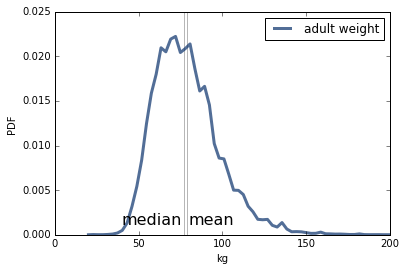

In [10]:
# wget http://thinkstats.com/CDBRFS08.ASC.gz

import brfss

df = brfss.ReadBrfss(nrows=None)
data = df.wtkg2.dropna()
print('Adult weight')
mean, median = Summarize(data)

y = 0.02499
VertLine(mean, y)
thinkplot.Text(mean+1, 0.1*y, 'mean', horizontalalignment='left')
VertLine(median, y)
thinkplot.Text(median-1.5, 0.1*y, 'median', horizontalalignment='right')

pdf = thinkstats2.EstimatedPdf(data)
thinkplot.Pdf(pdf, label='adult weight')
thinkplot.Config(root='density_wtkg2_kde',
               xlabel='kg',
               ylabel='PDF',
               xlim=[0, 200])

BRFSS成年人体重分布：
- 分布看起来向右偏
- 均值确实比中位数大
- 样本偏度和Pearson偏度都是正数